<a href="https://colab.research.google.com/github/khyz/AI_Python_examples/blob/main/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

### <a name='a2'></a> Załadowanie danych

In [3]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2025-01-16 to 2020-01-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.head(6)

In [ ]:
df.tail()

In [ ]:
df.tail(10)

In [ ]:
df.columns

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

In [ ]:
df.describe()

In [ ]:
df.describe().T

### <a name='a4'></a> Selekcja kolumn

In [ ]:
df = df.head(10)
df

In [ ]:
df['open']

In [ ]:
df.open

In [ ]:
df[['open']]

In [ ]:
df[['open', 'close']]

In [ ]:
df.iloc[:, 0]

In [ ]:
df.iloc[:, [0, 3]]

In [ ]:
df.iloc[:, 3:5]

In [ ]:
df.iloc[:, -1]

In [ ]:
df.iloc[:, [-1]]

In [ ]:
df.iloc[:, -3:]


### <a name='a5'></a>  Selekcja wierszy

In [ ]:
df

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[:3]

In [ ]:
df_sub = df.sort_index()
df_sub

In [ ]:
df_sub.loc['2025-01-13':'2025-01-15']#bez sortowania to nie działa, inaczej niż w tutorialu

### <a name='a6'></a> Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.head(3)

In [7]:
df['Average'] = (df.Open + df.Close) / 2.0#definiowanie nowej kolumy - średnia
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-01-16,224.42,224.65,220.31,220.66,24757276,222.54
2025-01-15,222.83,223.57,220.75,223.35,31291257,223.09
2025-01-14,220.44,221.82,216.20,217.76,24711650,219.10
2025-01-13,218.06,219.40,216.47,218.46,27262655,218.26
2025-01-10,221.46,221.71,216.50,218.94,36811525,220.20


In [8]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-06-13,186.090,187.67,182.666,183.83,39721545,184.9600
2024-06-14,183.080,183.72,182.230,183.66,25456410,183.3700
2024-06-17,182.520,185.00,181.220,184.06,35601907,183.2900
2024-06-18,183.735,184.29,181.430,182.81,36659157,183.2725
2024-06-20,182.910,186.51,182.720,186.10,44726779,184.5050


In [9]:
df['Close_shift'] = df.Close.shift(1)#przesunięcie wartości w danej kolumnie o jeden w dół
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2024-06-13,186.090,187.67,182.666,183.83,39721545,184.9600,NaN
2024-06-14,183.080,183.72,182.230,183.66,25456410,183.3700,183.83
2024-06-17,182.520,185.00,181.220,184.06,35601907,183.2900,183.66
2024-06-18,183.735,184.29,181.430,182.81,36659157,183.2725,184.06
2024-06-20,182.910,186.51,182.720,186.10,44726779,184.5050,182.81


In [10]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-06-13,186.090,187.67,182.666,183.83,39721545,184.9600,NaN,NaN
2024-06-14,183.080,183.72,182.230,183.66,25456410,183.3700,183.83,-0.000925
2024-06-17,182.520,185.00,181.220,184.06,35601907,183.2900,183.66,0.002178
2024-06-18,183.735,184.29,181.430,182.81,36659157,183.2725,184.06,-0.006791
2024-06-20,182.910,186.51,182.720,186.10,44726779,184.5050,182.81,0.017997


In [ ]:
df['Daily_Change2'] = df.Close / df.Close_shift - 1

In [ ]:
del df['Daily_Change2']#usuwanie kolumn

In [ ]:
df.head()

In [ ]:
df.Daily_Change.min()

In [ ]:
df.Daily_Change.max()

<Axes: >

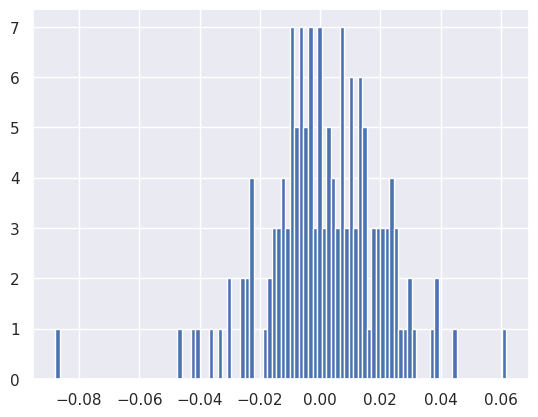

In [11]:
import seaborn as sns#biblioteka do wizualizacji statystycznych
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

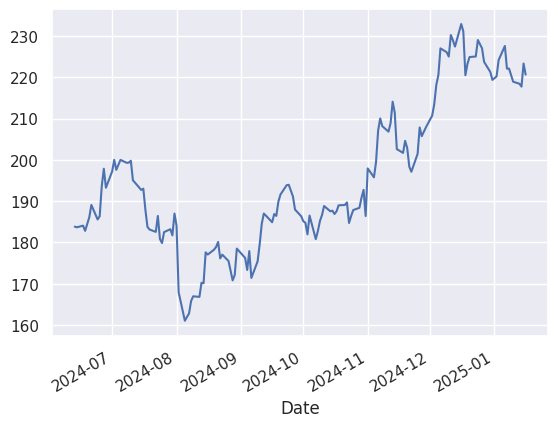

In [12]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [6]:
df = df[:149]
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-16,224.420,224.65,220.310,220.66,24757276
2025-01-15,222.830,223.57,220.750,223.35,31291257
2025-01-14,220.440,221.82,216.200,217.76,24711650
2025-01-13,218.060,219.40,216.470,218.46,27262655
2025-01-10,221.460,221.71,216.500,218.94,36811525
...,...,...,...,...,...
2024-06-20,182.910,186.51,182.720,186.10,44726779
2024-06-18,183.735,184.29,181.430,182.81,36659157
2024-06-17,182.520,185.00,181.220,184.06,35601907


In [13]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-06-17,182.520,185.000,181.22,184.06,35601907,183.2900,183.66,0.002178
2024-06-20,182.910,186.510,182.72,186.10,44726779,184.5050,182.81,0.017997
2024-06-21,187.800,189.275,185.86,189.08,72931754,188.4400,186.10,0.016013
2024-06-25,186.810,188.840,185.42,186.34,45898475,186.5750,185.57,0.004149
2024-06-26,186.920,194.800,186.26,193.61,65103893,190.2650,186.34,0.039015
...,...,...,...,...,...,...,...,...
2025-01-02,222.030,225.150,218.19,220.22,33956579,221.1250,219.39,0.003783
2025-01-03,222.505,225.360,221.62,224.19,27515606,223.3475,220.22,0.018027
2025-01-06,226.780,228.835,224.84,227.61,31849831,227.1950,224.19,0.015255


In [14]:
df_positive.Daily_Change.mean()

0.014748164052403206

In [15]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-06-14,183.080,183.720,182.2300,183.66,25456410,183.3700,183.83,-0.000925
2024-06-18,183.735,184.290,181.4300,182.81,36659157,183.2725,184.06,-0.006791
2024-06-24,189.330,191.000,185.3300,185.57,50610379,187.4500,189.08,-0.018564
2024-06-28,197.730,198.850,192.5000,193.25,76930192,195.4900,197.85,-0.023250
2024-07-03,199.940,200.029,196.7601,197.59,31597926,198.7650,200.00,-0.012050
...,...,...,...,...,...,...,...,...
2025-01-07,227.900,228.381,221.4600,222.11,28084164,225.0050,227.61,-0.024164
2025-01-10,221.460,221.710,216.5000,218.94,36811525,220.2000,222.13,-0.014361
2025-01-13,218.060,219.400,216.4700,218.46,27262655,218.2600,218.94,-0.002192


In [16]:
 df_negative.Daily_Change.mean()

-0.013846482080152628

In [17]:
df.Close == df.High

,0
Date,
2024-06-13,False
2024-06-14,False
2024-06-17,False
2024-06-18,False
2024-06-20,False
...,...
2025-01-10,False
2025-01-13,False
2025-01-14,False


In [18]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [19]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [20]:
df.index > '2025-01-10'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
df[df.index > '2025-01-10']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-01-13,218.06,219.40,216.47,218.46,27262655,218.26,218.94,-0.002192
2025-01-14,220.44,221.82,216.20,217.76,24711650,219.10,218.46,-0.003204
2025-01-15,222.83,223.57,220.75,223.35,31291257,223.09,217.76,0.025670
2025-01-16,224.42,224.65,220.31,220.66,24757276,222.54,223.35,-0.012044


In [23]:
df[(df.index >= '2024-11-01') & (df.index < '2025-01-10')]# and nie jest obsługiwane

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-11-01,198.860,200.5000,197.0200,197.93,99687847,198.3950,186.40,0.061856
2024-11-04,196.450,197.3300,194.3101,195.78,38492062,196.1150,197.93,-0.010862
2024-11-05,196.040,199.8200,195.9900,199.50,30564784,197.7700,195.78,0.019001
2024-11-06,200.010,207.5500,199.1400,207.09,72292167,203.5500,199.50,0.038045
2024-11-07,207.440,212.2500,207.1900,210.05,52878383,208.7450,207.09,0.014293
2024-11-08,209.720,209.9633,207.4400,208.18,36075846,208.9500,210.05,-0.008903
2024-11-11,208.500,209.6500,205.5900,206.84,35456012,207.6700,208.18,-0.006437
2024-11-12,208.370,209.5400,206.0100,208.91,38942918,208.6400,206.84,0.010008
2024-11-13,209.400,215.0900,209.1400,214.10,46212943,211.7500,208.91,0.024843


In [24]:
df[(df.index == '2024-11-01') | (df.index < '2025-01-10')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-06-13,186.090,187.670,182.666,183.83,39721545,184.9600,NaN,NaN
2024-06-14,183.080,183.720,182.230,183.66,25456410,183.3700,183.83,-0.000925
2024-06-17,182.520,185.000,181.220,184.06,35601907,183.2900,183.66,0.002178
2024-06-18,183.735,184.290,181.430,182.81,36659157,183.2725,184.06,-0.006791
2024-06-20,182.910,186.510,182.720,186.10,44726779,184.5050,182.81,0.017997
...,...,...,...,...,...,...,...,...
2025-01-02,222.030,225.150,218.190,220.22,33956579,221.1250,219.39,0.003783
2025-01-03,222.505,225.360,221.620,224.19,27515606,223.3475,220.22,0.018027
2025-01-06,226.780,228.835,224.840,227.61,31849831,227.1950,224.19,0.015255


In [26]:
df.index.month == 5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
df[df.index.month == 1] #konkretny miesiac

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-01-02,222.030,225.150,218.19,220.22,33956579,221.1250,219.39,0.003783
2025-01-03,222.505,225.360,221.62,224.19,27515606,223.3475,220.22,0.018027
2025-01-06,226.780,228.835,224.84,227.61,31849831,227.1950,224.19,0.015255
2025-01-07,227.900,228.381,221.46,222.11,28084164,225.0050,227.61,-0.024164
2025-01-08,223.185,223.520,220.20,222.13,25033292,222.6575,222.11,0.000090
2025-01-10,221.460,221.710,216.50,218.94,36811525,220.2000,222.13,-0.014361
2025-01-13,218.060,219.400,216.47,218.46,27262655,218.2600,218.94,-0.002192
2025-01-14,220.440,221.820,216.20,217.76,24711650,219.1000,218.46,-0.003204
2025-01-15,222.830,223.570,220.75,223.35,31291257,223.0900,217.76,0.025670


In [29]:
df[df.index.year == 2024]#konkretny rok

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-06-13,186.090,187.6700,182.6660,183.83,39721545,184.9600,NaN,NaN
2024-06-14,183.080,183.7200,182.2300,183.66,25456410,183.3700,183.83,-0.000925
2024-06-17,182.520,185.0000,181.2200,184.06,35601907,183.2900,183.66,0.002178
2024-06-18,183.735,184.2900,181.4300,182.81,36659157,183.2725,184.06,-0.006791
2024-06-20,182.910,186.5100,182.7200,186.10,44726779,184.5050,182.81,0.017997
...,...,...,...,...,...,...,...,...
2024-12-24,226.940,229.1400,226.1300,229.05,15007497,227.9950,225.06,0.017729
2024-12-26,228.500,228.5000,226.6706,227.05,16174500,227.7750,229.05,-0.008732
2024-12-27,225.600,226.0300,220.9000,223.75,27367147,224.6750,227.05,-0.014534


In [30]:
df[df.index.day == 1]#konkretny dzień w miesiacu

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-07-01,193.490,198.2957,192.8200,197.20,41192011,195.3450,193.25,0.020440
2024-08-01,189.285,190.6000,181.8700,184.07,70435635,186.6775,186.98,-0.015563
2024-10-01,184.900,186.1900,183.4519,185.13,36044906,185.0150,186.33,-0.006440
2024-11-01,198.860,200.5000,197.0200,197.93,99687847,198.3950,186.40,0.061856
